<a href="https://colab.research.google.com/github/693080593/research/blob/master/Polynomial(Tricomponent)_Cheng_2021_Whole_121820_%5B7%5D_cHB_ANN_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080620 Polynomial Cheng 2021 Whole 121820.csv')
Oil_Yields = data['Bio-crude Oil Yield']
Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

# data[:240:30]


Bio-crude dataset has 225 data points with 64 variables each.


(225, 64)

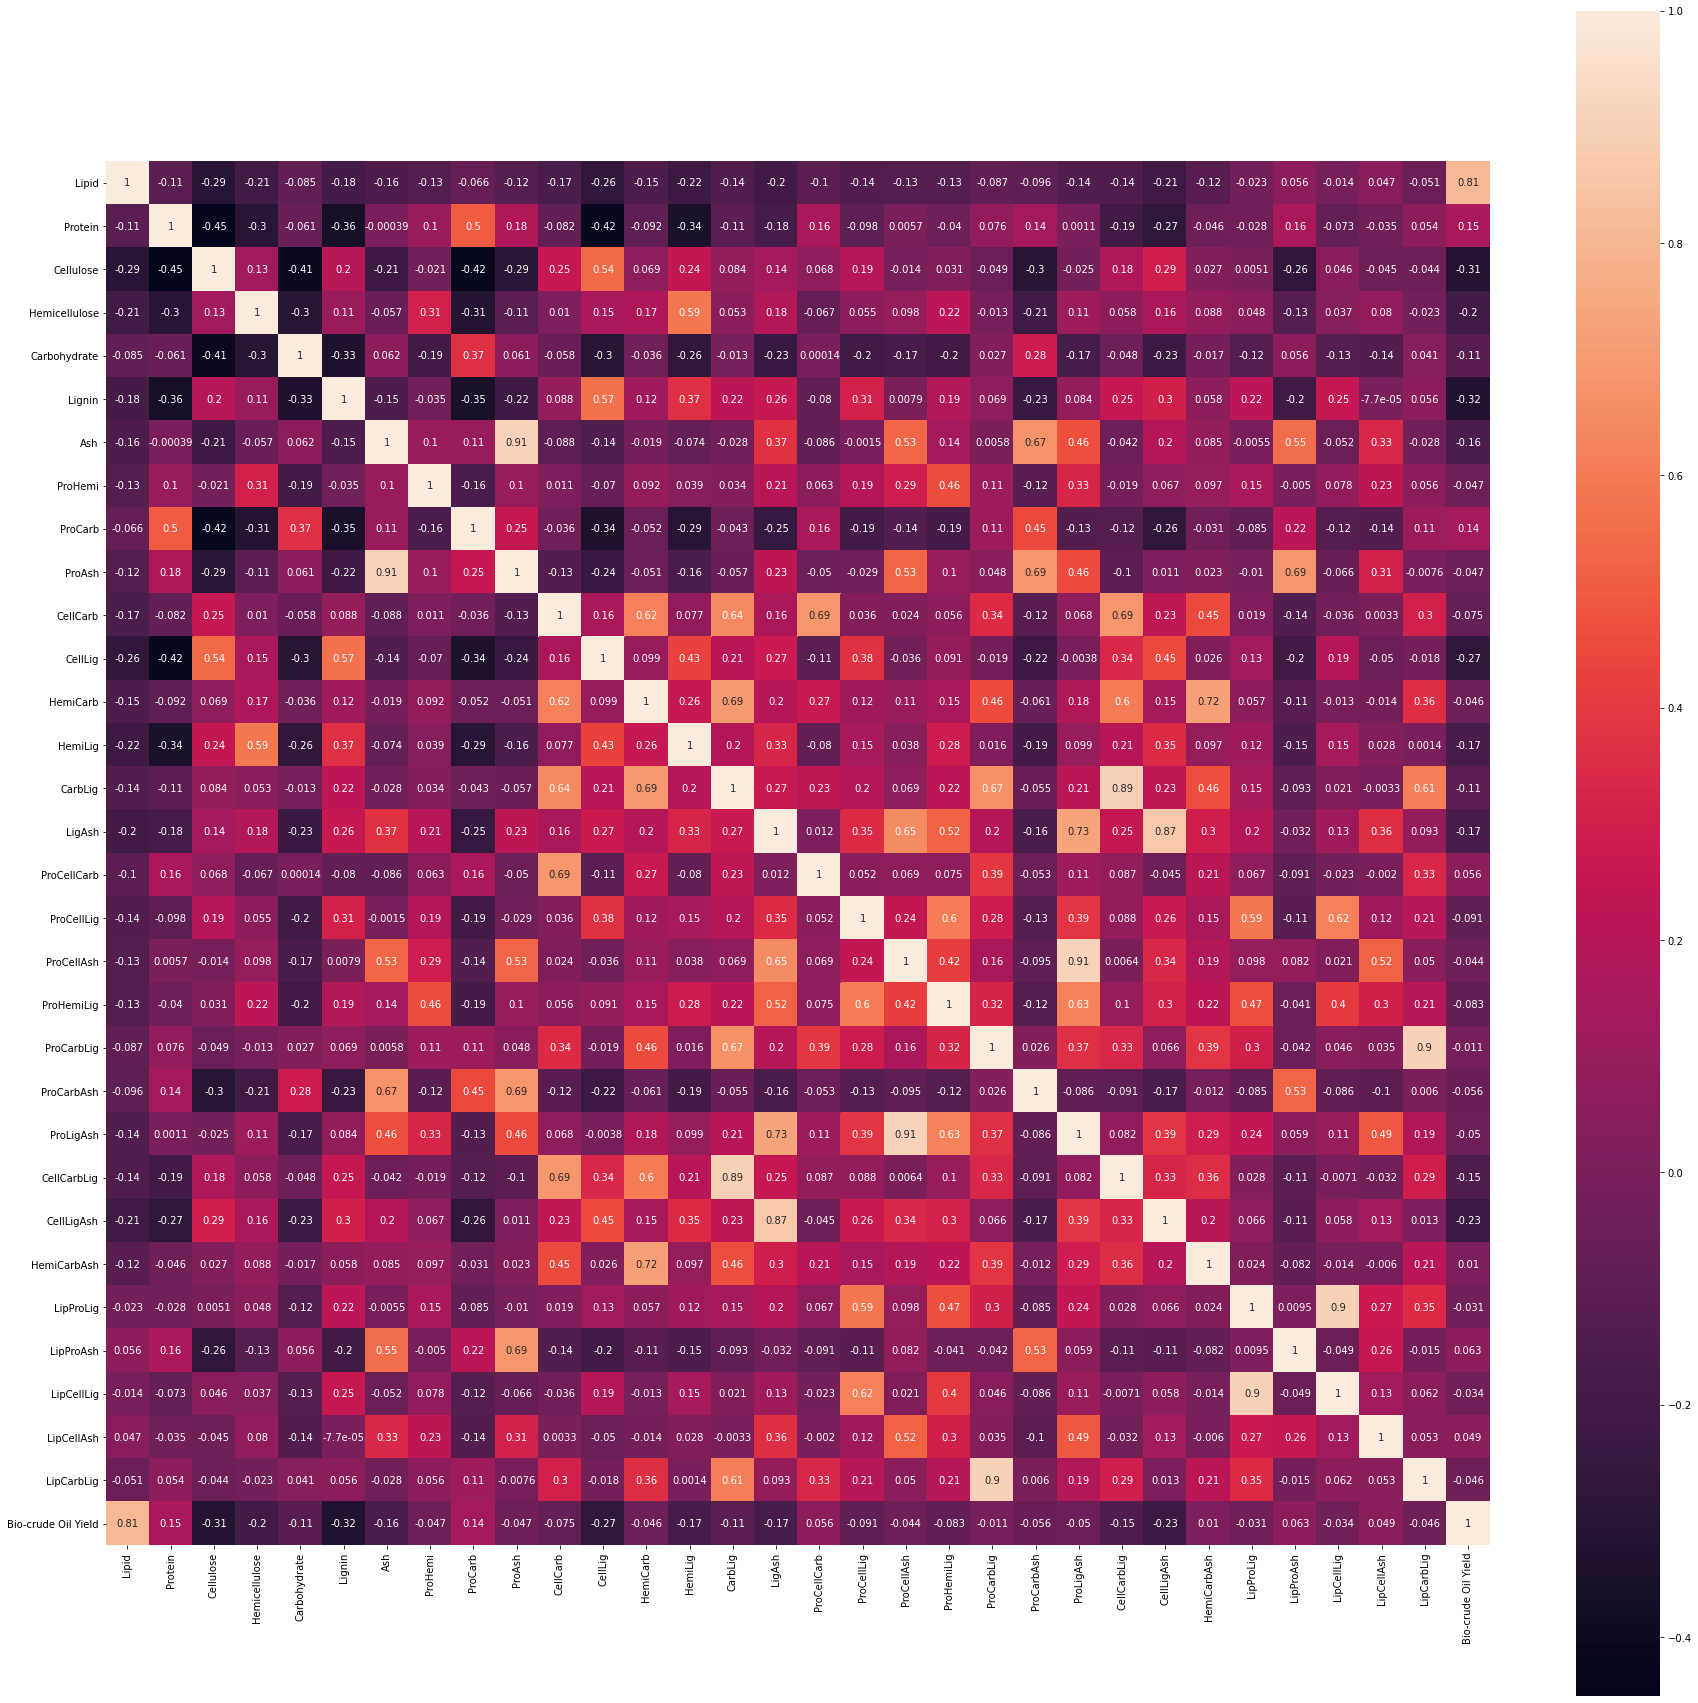

In [ ]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(31,31))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [2]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use now.
#written by Wenjing.
#apply multi-layer perceptron to data
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 79)
data['random'] = np.random.random(size = len(data))


# Lets split the data into 5 folds. 
from sklearn.model_selection import KFold
kf =KFold(n_splits=5, shuffle=True)

# R2_all=[]
mape_all=[]
mape_train_all=[]
mape_rfr_all=[]
y_test_list=[]
y_pred_list=[]
for train_index, test_index in kf.split(Features, Oil_Yields):
    #fixed by Wenjing
    X_train, X_test = Features.loc[train_index,:],Features.loc[test_index,:]
    y_train, y_test = Oil_Yields.loc[train_index],Oil_Yields.loc[test_index]
    #random forest regressor
    rfr=RandomForestRegressor(max_depth=15, n_estimators=80, random_state=262).fit(X_train, y_train)
    y_pred_rfr=rfr.predict(X_test)
    mape_rfr=mean_absolute_percentage_error(y_test, y_pred_rfr)
    mape_rfr_all.append(mape_rfr)
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(random_state=262, hidden_layer_sizes=(100,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True).fit(X_train, y_train)
    y_pred=mlpr.predict(X_test)
#     R2=regr.score(X_test, y_test)
#     R2_all.append(R2)
    mape=mean_absolute_percentage_error(y_test, y_pred) #test error
    mape_all.append(mape) #test error for all folds
    mape_train=mean_absolute_percentage_error(y_train, mlpr.predict(X_train)) #training error
    mape_train_all.append(mape_train) #training error for all folds
    
    y_test_list.append(y_test.values)
    y_pred_list.append(y_pred)
    
print("MAPE (test) from MLP",mape_all)
print("MAPE (train) from MLP",mape_train_all)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)
# print("y_true", y_test_all)
# print("y_pred", y_pred_all)

In [3]:
#apply multi-layer perceptron to data
from sklearn.neural_network import MLPRegressor
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 79)
data['random'] = np.random.random(size = len(data))


# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.loc[train_index,:],Features.loc[test_index,:]
    y_train, y_test = Oil_Yields.loc[train_index],Oil_Yields.loc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(100,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)

    # Predict training set and test set
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1

    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 5.81195173037235
Standard deviation of MAE of training set 0.9336527746905564
Mean value of MAE of test set 6.60834349598221
Standard deviation of MAE of test set 0.807813603014382

Mean value of RMSE of training set 7.566484159822342
Standard deviation of RMSE of training set 1.2809120089456272
Mean value of RMSE of test set 8.489371813679199
Standard deviation of RMSE of test set 1.4431731722575667

Mean value of R2 of training set 0.7896549014687504
Standard deviation of R2 of training set 0.07159744355001084
Mean value of R2 of test set 0.7280095469093102
Standard deviation of R2 of test set 0.10574580309177246

Mean value of MRE of training set 0.21167479169146625
Standard deviation of MRE of training set 0.032885490217621
Mean value of MRE of test set 0.2417675198244537
Standard deviation of MRE of test set 0.0356672483163069


Text(0.5, 1.0, 'y_pred vs. y_true')

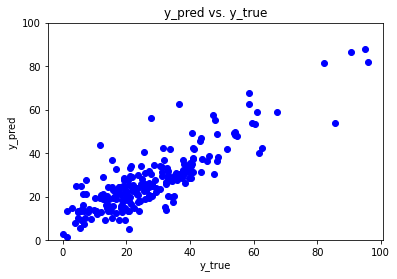

In [4]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ANN.csv', index = False, header=True)

In [ ]:
# hidden_layer_sizes 参数的最佳取值(1, 201, 1)

for i in range(1, 201, 1):
  #apply multi-layer perceptron to data
  from sklearn.neural_network import MLPRegressor
  # https://scikit-learn.org/stable/modules/neural_networks_supervised.html
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.loc[train_index,:],Features.loc[test_index,:]
    y_train, y_test = Oil_Yields.loc[train_index],Oil_Yields.loc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(i,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)
    
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

In [ ]:
# max_iter 参数的最佳取值(100, 1000, 100)

for i in range(100, 1000, 100):
  #apply multi-layer perceptron to data
  from sklearn.neural_network import MLPRegressor
  # https://scikit-learn.org/stable/modules/neural_networks_supervised.html
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.loc[train_index,:],Features.loc[test_index,:]
    y_train, y_test = Oil_Yields.loc[train_index],Oil_Yields.loc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(129,),max_iter=i, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)
    
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

In [ ]:
# learning_rate_init 参数的最佳取值(0.0005, 0.002, 0.0001)

for i in range(5, 20, 1):
  #apply multi-layer perceptron to data
  from sklearn.neural_network import MLPRegressor
  # https://scikit-learn.org/stable/modules/neural_networks_supervised.html
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.loc[train_index,:],Features.loc[test_index,:]
    y_train, y_test = Oil_Yields.loc[train_index],Oil_Yields.loc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(129,),max_iter=400, 
                       learning_rate_init=i/10000,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)
    
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

In [8]:
#apply multi-layer perceptron to data
from sklearn.neural_network import MLPRegressor
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 79)
data['random'] = np.random.random(size = len(data))


# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.loc[train_index,:],Features.loc[test_index,:]
    y_train, y_test = Oil_Yields.loc[train_index],Oil_Yields.loc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(129,),max_iter=400, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)

    # Predict training set and test set
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1

    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 4.885341657957066
Standard deviation of MAE of training set 0.40306066016715647
Mean value of MAE of test set 6.483011766837636
Standard deviation of MAE of test set 0.7918746958939302

Mean value of RMSE of training set 6.446996755994133
Standard deviation of RMSE of training set 0.5034539109986205
Mean value of RMSE of test set 8.292858041536842
Standard deviation of RMSE of test set 1.1561948378329485

Mean value of R2 of training set 0.850221783118932
Standard deviation of R2 of training set 0.023302634894528
Mean value of R2 of test set 0.7437258751124672
Standard deviation of R2 of test set 0.08054012800060946

Mean value of MRE of training set 0.17797066874215833
Standard deviation of MRE of training set 0.013524752067953604
Mean value of MRE of test set 0.237307027980643
Standard deviation of MRE of test set 0.035636244739502373


Text(0.5, 1.0, 'y_pred vs. y_true')

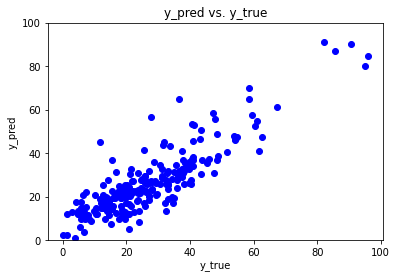

In [9]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ANN_Opt.csv', index = False, header=True)